# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group, clean_data

df = load_data('output/q5_cleaned_data.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 6980 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [79]:
# TODO: Group by site
summary_site = summarize_by_group(df,'site')
display(summary_site)

Unnamed: 0                                                          \
            count         mean          std   min     25%     50%     75%   
site                                                                        
site a     2120.0  5025.561321  2925.955038   6.0  2465.5  4961.5  7591.0   
site b     1718.0  4917.618161  2893.635328   0.0  2422.5  4882.5  7413.0   
site c     1447.0  5062.991016  2850.912729   2.0  2664.5  5097.0  7567.0   
site d     1009.0  4968.209118  2879.025560   3.0  2455.0  4994.0  7477.0   
site e      686.0  5079.572886  2893.605346  13.0  2608.0  5213.0  7612.0   

                   age             ... adverse_events      adherence_pct  \
           max   count       mean  ...            75%  max         count   
site                               ...                                     
site a  9999.0  2120.0  80.873113  ...            0.0  3.0        2120.0   
site b  9986.0  1718.0  80.515134  ...            0.0  4.0        1718.0   
site c  9997.0  1447.0  81.024188  ...            0.0  3.0        1447.0   
site d  9987.0  1009.0  81.000000  ...            0.0  2.0        1009.0   
site e  9989.0   686.0  80.526239  ...            0.0  2.0         686.0   

                                                             
             mean        std   min   25%   50%   75%    max  
site                                                         
site a  61.538679  18.972258  20.0  48.0  62.0  75.0  100.0  
site b  61.058207  19.118308  20.0  47.0  62.0  75.0  100.0  
site c  60.784381  18.265764  20.0  49.0  62.0  74.0  100.0  
site d  59.935580  19.066322  20.0  47.0  61.0  75.0  100.0  
site e  58.077259  19.549709  20.0  44.0  57.5  73.0  100.0  

[5 rows x 96 columns]

In [80]:
# TODO: Count by intervention group
df['intervention_group'] = df['intervention_group'].str.replace('contrl', 'control')
df['intervention_group'] = df['intervention_group'].str.replace('treatmen a', 'treatment a')
df['intervention_group'] = df['intervention_group'].str.replace('treatmenta', 'treatment a')
summary_treatment = summarize_by_group(df, 'intervention_group')
display(summary_treatment)

Unnamed: 0                                                  \
                        count         mean          std  min      25%     50%   
intervention_group                                                              
control                2310.0  4930.160606  2909.086232  0.0  2351.75  4933.0   
treatment a            2312.0  5027.129325  2876.594933  6.0  2508.25  4997.5   
treatment b            2358.0  5052.977947  2891.184101  2.0  2578.75  5073.0   

                                        age             ... adverse_events  \
                        75%     max   count       mean  ...            75%   
intervention_group                                      ...                  
control             7449.75  9998.0  2310.0  81.043290  ...            0.0   
treatment a         7577.50  9999.0  2312.0  80.723183  ...            0.0   
treatment b         7585.25  9995.0  2358.0  80.638677  ...            0.0   

                        adherence_pct                                          \
                    max         count       mean        std   min   25%   50%   
intervention_group                                                              
control             2.0        2310.0  61.016883  18.846814  20.0  48.0  62.0   
treatment a         4.0        2312.0  60.389273  19.235560  20.0  47.0  61.0   
treatment b         3.0        2358.0  60.670908  18.791519  20.0  48.0  61.0   

                                 
                     75%    max  
intervention_group               
control             75.0  100.0  
treatment a         75.0  100.0  
treatment b         74.0  100.0  

[3 rows x 96 columns]

**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [81]:
# TODO: Use summarize_by_group utility
summary_intervention = summarize_by_group(df,'site',agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'})
display(summary_intervention)

age                   bmi
             mean        std       mean
site                                   
site a  80.873113  13.832253  25.814953
site b  80.515134  13.455574  25.701630
site c  81.024188  13.245688  25.782032
site d  81.000000  13.214500  25.558870
site e  80.526239  13.724985  25.529738

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [82]:
# TODO: Multiple aggregations
site_agg = summarize_by_group(df,'site',agg_dict={'age': ['mean', 'std','min', 'max'], 'bmi': ['mean', 'std'], 'systolic_bp': ['mean', 'median']})
display(site_agg)

age                                bmi           systolic_bp  \
             mean        std   min    max       mean       std        mean   
site                                                                         
site a  80.873113  13.832253  44.0  100.0  25.814953  5.061923  117.035377   
site b  80.515134  13.455574  46.0  100.0  25.701630  4.944060  117.072759   
site c  81.024188  13.245688  45.0  100.0  25.782032  5.307569  117.705598   
site d  81.000000  13.214500  47.0  100.0  25.558870  6.000338  118.147671   
site e  80.526239  13.724985  47.0  100.0  25.529738  6.001196  117.572886   

               
       median  
site           
site a  117.0  
site b  117.0  
site c  117.0  
site d  118.0  
site e  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [ ]:
# TODO: Intervention group comparisons

df['outcome_cvd'] = df['outcome_cvd'].replace('yes', 1)
df['outcome_cvd'] = df['outcome_cvd'].replace('no', 0)
cvd_group = summarize_by_group(df, 'intervention_group', agg_dict={'outcome_cvd': 'mean'})
display(cvd_group)
ad_group = summarize_by_group(df, 'intervention_group', agg_dict={'adherence_pct': 'mean'})
display(ad_group)
comparison = pd.crosstab(df['dropout'],df['intervention_group'])
display(comparison)


/var/folders/xf/qfyxwpds1l75t78knjlzq1z00000gn/T/ipykernel_60938/3900515254.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['outcome_cvd'] = df['outcome_cvd'].replace('no', 0)


,outcome_cvd
intervention_group,
control,0.343723
treatment a,0.319204
treatment b,0.331213


,adherence_pct
intervention_group,
control,61.016883
treatment a,60.389273
treatment b,60.670908


intervention_group,control,treatment a,treatment b
dropout,,,
no,2310,2312,2358


<Axes: xlabel='intervention_group'>

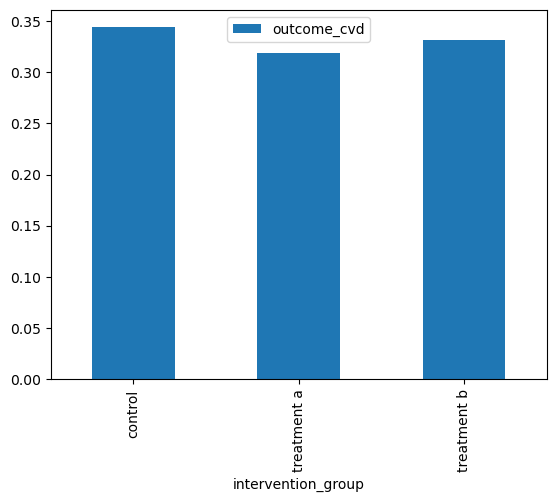

In [131]:
# TODO: Visualization
#plot_group_comparison(ad_group,ad_group['intervention_group'],adherence_pct,"testtitle") 
cvd_group.plot(kind='bar')


## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [85]:
# TODO: Save summary outputs
summary_site.to_csv('output/q7_site_summary.csv')
summary_intervention.to_csv('output/q7_intervention_comparison.csv')
report = f'Outcome:\n{cvd_group}\nAdherence:\n{ad_group}'
with open('output/q7_analysis_report.txt', 'w') as file:
    file.write(report)


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Outcome occurance was about the same in each group 
2. Adherence was also about the same for each treatment
3. After data cleaning there are no dropouts
